Healthcare Classification

Dataset : https://www.kaggle.com/code/hainescity/healthcare-dataset-eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('healthcare_dataset.csv')
df = pd.DataFrame(data)

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.shape

(55500, 15)

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [5]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [6]:
df.drop(['Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Room Number', 'Hospital', 'Insurance Provider'], axis=1, inplace=True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,14238.317814,Urgent,Penicillin,Abnormal


In [7]:
df_temp = df[['Age', 'Gender', 'Billing Amount', 'Test Results']]
df_temp.head()

,Age,Gender,Billing Amount,Test Results
0,30,Male,18856.281306,Normal
1,62,Male,33643.327287,Inconclusive
2,76,Female,27955.096079,Normal
3,28,Female,37909.782410,Abnormal
4,43,Female,14238.317814,Abnormal


In [8]:
df_temp['Gender'] = df_temp['Gender'].map({"Male":0, "Female":1})
df_temp['Test Results'] = df_temp['Test Results'].map({"Normal":0, "Abnormal":1, "Inconclusive":2})

mns = MinMaxScaler()
df_temp[['Billing Amount']] = mns.fit_transform(df_temp[['Billing Amount']])
df_temp[['Age']] = mns.fit_transform(df_temp[['Age']])

df_temp.head()

<ipython-input-8-18323b57f49e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Gender'] = df_temp['Gender'].map({"Male":0, "Female":1})
<ipython-input-8-18323b57f49e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Test Results'] = df_temp['Test Results'].map({"Normal":0, "Abnormal":1, "Inconclusive":2})
<ipython-input-8-18323b57f49e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Age,Gender,Billing Amount,Test Results
0,0.223684,0,0.380933,0
1,0.644737,0,0.650904,2
2,0.828947,1,0.547053,0
3,0.197368,1,0.728798,1
4,0.394737,1,0.296622,1


In [9]:
df.drop(['Age', 'Gender', 'Billing Amount', 'Test Results'], axis=1, inplace=True)
df.head()

,Blood Type,Medical Condition,Admission Type,Medication
0,B-,Cancer,Urgent,Paracetamol
1,A+,Obesity,Emergency,Ibuprofen
2,A-,Obesity,Emergency,Aspirin
3,O+,Diabetes,Elective,Ibuprofen
4,AB+,Cancer,Urgent,Penicillin


In [10]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True


In [11]:
df_new = pd.concat([df_temp, df], axis=1)
df_new.head()

,Age,Gender,Billing Amount,Test Results,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,0.223684,0,0.380933,0,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False
1,0.644737,0,0.650904,2,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
2,0.828947,1,0.547053,0,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0.197368,1,0.728798,1,False,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
4,0.394737,1,0.296622,1,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


In [12]:
x = df_new.drop(['Test Results'], axis=1)
y = df_new['Test Results']

In [13]:
y = pd.DataFrame(data)
y = y['Test Results']
y.head()

,Test Results
0,Normal
1,Inconclusive
2,Normal
3,Abnormal
4,Abnormal


In [14]:
y_label = pd.get_dummies(y)
y_label.head()

,Abnormal,Inconclusive,Normal
0,False,False,True
1,False,True,False
2,False,False,True
3,True,False,False
4,True,False,False


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y_label, random_state=42, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, random_state=42, test_size=0.2)

In [26]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, input_dim = x_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,171 (309.26 KB)

 Trainable params: 79,171 (309.26 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=500)

Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3326 - loss: 0.6509 - val_accuracy: 0.3365 - val_loss: 0.6369
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3377 - loss: 0.6370 - val_accuracy: 0.3314 - val_loss: 0.6373
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3439 - loss: 0.6369 - val_accuracy: 0.3323 - val_loss: 0.6373
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3487 - loss: 0.6364 - val_accuracy: 0.3271 - val_loss: 0.6376
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3391 - loss: 0.6363 - val_accuracy: 0.3339 - val_loss: 0.6374
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3643 - loss: 0.6352 - val_accuracy: 0.3338 - val_loss: 0.6375
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3671 - loss: 0.6345 - val_accuracy: 0.3328 - val_loss: 0.6381
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3746 - loss: 0.6337 - val_accuracy: 0.

In [29]:
model.evaluate(x_test, y_test)

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3954 - loss: 1.6556


[1.673313856124878, 0.39225226640701294]

In [30]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
y_test = np.argmax(y_test, axis=-1)

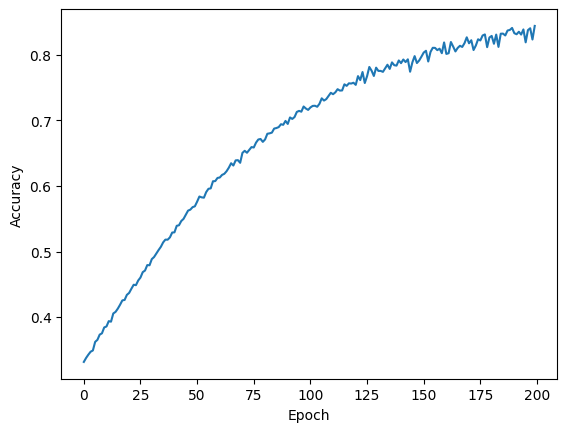

In [32]:
plt.plot(hist.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

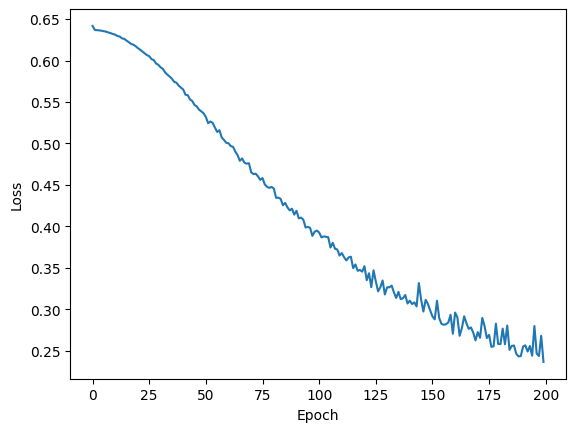

In [33]:
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<Axes: >

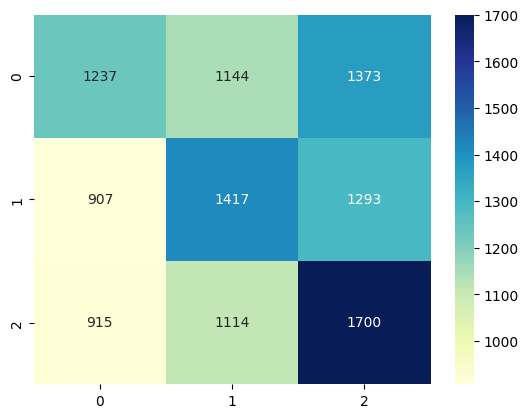

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='YlGnBu', fmt='g')